## Worshop 2.2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [30]:
%matplotlib inline
import pandas as pd
pd.__version__

'2.2.3'

Если вы увидели warning, не переживайте, всё хорошо. 
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [31]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


1) Выведите последние 10 элеметнов датасета

In [32]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2) Сколько колонок и сколько строк в этом датасете?

In [33]:
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [34]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

In [35]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

print("Признаки с пропусками и их количество:\n", missing_data)

Признаки с пропусками и их количество:
 workclass         1836
occupation        1843
native.country     583
dtype: int64


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: человек может не знать, как классифицировать свою работу., а если он никогда не работал, то как заполнить профессию? Кроме того, человек может стесняться ответа на какой-либо вопрос

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [36]:
workclass_counts = df['workclass'].value_counts(dropna=False)

display(workclass_counts)

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
NaN                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

7) Какой средний возраст женщин и мужчин?

In [37]:
average_age_by_sex = df.groupby('sex')['age'].mean()

print("Средний возраст женщин и мужчин:\n", average_age_by_sex)

Средний возраст женщин и мужчин:
 sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64


8) Постройте гистограмму(bar) распределения образования людей (education)

In [38]:
import matplotlib.pyplot as plt


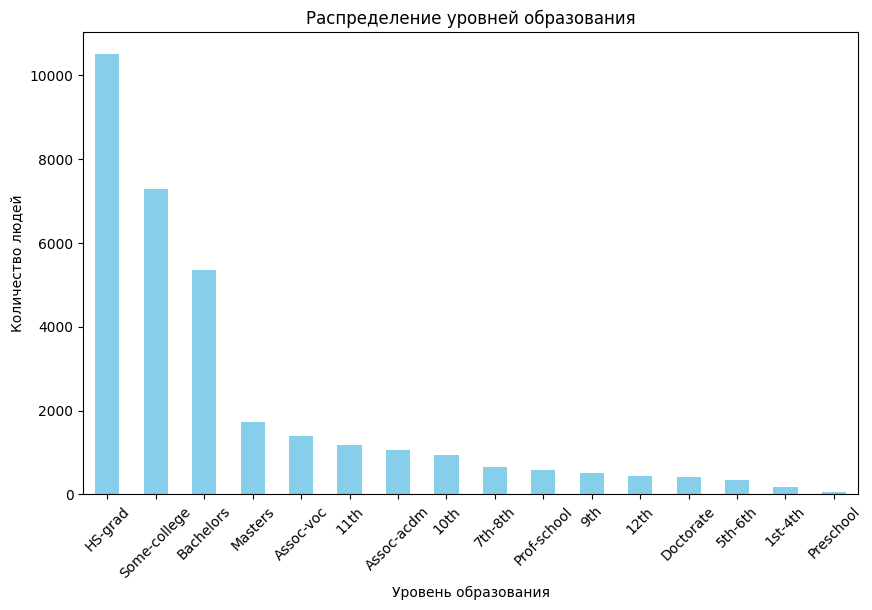

In [39]:
education_counts = df['education'].value_counts()

# Строим bar-график
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение уровней образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество людей')
plt.xticks(rotation=45)
plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [40]:
salary_stats = df.groupby('income')['age'].agg(['mean', 'std'])

print("Средние значения и стандартные отклонения возраста по уровню дохода:\n", salary_stats)

Средние значения и стандартные отклонения возраста по уровню дохода:
              mean        std
income                      
<=50K   36.783738  14.020088
>50K    44.249841  10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [41]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
high_income_education_check = df[(df['income'] == '>50K') & (~df['education'].isin(higher_education))]

# Если high_income_education_check пустой, значит, все с доходом >50K имеют как минимум высшее образование
if high_income_education_check.empty:
    print("Да, все люди с доходом более 50K имеют как минимум высшее образование.")
else:
    print("Нет, есть люди с доходом более 50K, но без высшего образования.")


print("Количество людей с доходом более 50K без высшего образования:", df[(df['income'] == '>50K') & (~df['education'].isin(higher_education))].shape[0])



Нет, есть люди с доходом более 50K, но без высшего образования.
Количество людей с доходом более 50K без высшего образования: 3306


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [42]:
married_status = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']

# Добавляем признак "Женат"/"Холост"
df['marital_group'] = df['marital.status'].apply(lambda x: 'Married' if x in married_status else 'Single')

# Вычисляем долю
high_income_share = df[df['sex'] == 'Male'].groupby('marital_group')['income'].apply(lambda x: (x == '>50K').mean())

print("Доля зарабатывающих более 50K среди мужчин:")
print(high_income_share)

Доля зарабатывающих более 50K среди мужчин:
marital_group
Married    0.440514
Single     0.084495
Name: income, dtype: float64


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [43]:
average_hours_by_salary_and_country = df.groupby(['native.country', 'income'])['hours.per.week'].mean()

display(average_hours_by_salary_and_country)

native.country  income
Cambodia        <=50K     41.416667
                >50K      40.000000
Canada          <=50K     37.914634
                >50K      45.641026
China           <=50K     37.381818
                            ...    
United-States   >50K      45.505369
Vietnam         <=50K     37.193548
                >50K      39.200000
Yugoslavia      <=50K     41.600000
                >50K      49.500000
Name: hours.per.week, Length: 80, dtype: float64

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [44]:
import numpy as np

In [45]:
df['passive_income'] = df['capital.gain'] - df['capital.loss']

# Преобразуем пассивный доход в категориальный признак с использованием логарифмирования и округления
df['passive_income_category'] = np.round(np.log1p(df['passive_income'] + 1), 2)

# Строим сводную таблицу по уровню образования и категории пассивного дохода
pivot_table = df.pivot_table(values='hours.per.week', index='education', columns='passive_income_category', aggfunc='mean')

display(pivot_table)

d:\Works\Python\FourthCourse\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


passive_income_category,0.69,4.75,6.00,6.39,6.82,6.90,6.96,6.99,7.01,7.05,...,9.67,9.82,9.91,10.00,10.13,10.14,10.23,10.44,10.63,11.51
education,,,,,,,,,,,,,,,,,,,,,
10th,36.780347,40.0,NaN,30.000000,NaN,NaN,25.000000,20.0,NaN,NaN,...,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,32.000000,NaN,40.000000
11th,33.589532,NaN,NaN,20.800000,NaN,NaN,22.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12th,35.466501,NaN,NaN,24.666667,NaN,NaN,40.000000,NaN,NaN,NaN,...,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st-4th,38.371069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5th-6th,38.467532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7th-8th,39.099656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9th,38.217300,37.5,NaN,40.000000,40.0,NaN,23.000000,NaN,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.000000
Assoc-acdm,40.233333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,...,NaN,NaN,4.000000,NaN,NaN,50.000000,NaN,NaN,NaN,40.000000
Assoc-voc,41.350921,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,55.0,NaN,40.000000,NaN,NaN,50.000000


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [46]:
women_df = df[df['sex'] == 'Female']

# Рассчитываем долю женщин с доходом >50K по странам
income_share_by_country = women_df.groupby('native.country')['income'].apply(lambda x: (x == '>50K').mean())

sorted_income_share = income_share_by_country.sort_values(ascending=False)

print("Доля женщин с доходом >50K по странам:\n", sorted_income_share)

Доля женщин с доходом >50K по странам:
 native.country
Yugoslavia                    0.333333
Taiwan                        0.266667
France                        0.250000
Iran                          0.250000
Japan                         0.250000
Italy                         0.238095
China                         0.238095
Canada                        0.230769
Greece                        0.200000
Scotland                      0.200000
England                       0.187500
India                         0.181818
Portugal                      0.166667
Hong                          0.166667
Hungary                       0.166667
Philippines                   0.164384
Honduras                      0.142857
Ireland                       0.142857
Laos                          0.125000
Germany                       0.116667
United-States                 0.110721
Poland                        0.105263
South                         0.100000
Thailand                      0.090909
Nicaragua

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [47]:
def generate_magic_salary(row):
    if row['income'] == '<=50K':
        return np.random.uniform(0, 50)
    else:
        return np.random.uniform(51, 200)

# Создаем новую колонку magic_salary
df['magic_salary'] = df.apply(generate_magic_salary, axis=1)

# Средняя ЗП в час для каждой группы по уровню образования
df['hourly_magic_salary'] = df['magic_salary'] / df['hours.per.week']

average_hourly_salary_by_education = df.groupby('education')['hourly_magic_salary'].mean()

display(average_hourly_salary_by_education)

education
10th            1.132735
11th            1.152779
12th            1.047325
1st-4th         0.880299
5th-6th         0.792419
7th-8th         1.066453
9th             0.989184
Assoc-acdm      1.574260
Assoc-voc       1.379755
Bachelors       1.693406
Doctorate       2.834107
HS-grad         1.114240
Masters         2.113794
Preschool       0.924692
Prof-school     2.361482
Some-college    1.249990
Name: hourly_magic_salary, dtype: float64